#### Importing the required libraries

In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn .decomposition import PCA
from sklearn.model_selection import train_test_split
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import sweetviz
import warnings
warnings.filterwarnings("ignore")

#### Loading the data

In [2]:
data=pd.read_csv(r"\content\BANKRUPTCY_PREDICTION.csv")

In [3]:
df=data.copy(deep=True)

#### Exploratory Data Analysis (EDA)

In [4]:
df.shape

(6819, 95)

In [5]:
df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1


In [6]:
# Checking for null values
df.isnull().sum().sum()

0

In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [8]:
df.dtypes

 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
 Operating Profit Rate                                      float64
 Pre-tax net Interest Rate                                  float64
 After-tax net Interest Rate                                float64
 Non-industry income and expenditure/revenue                float64
 Continuous interest rate (after tax)                       float64
 Operating Expense Rate                                     float64
 Research and development expense rate                      float64
 Cash flow rate                                             float64
 Interest-bearing debt interest rate                        float64
 Tax rate (A)                                   

In [9]:
df.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan �,Operating Profit Per Share (Yuan �,Per Share Net profit before tax (Yuan �,Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.22

In [50]:
report = sweetviz.analyze(df,"Bankrupt")
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


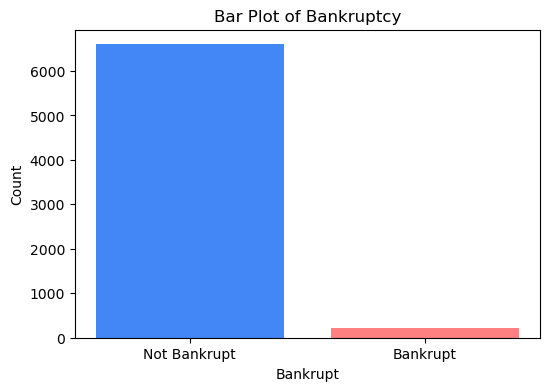

In [10]:
# Plotting the target varaiable
counts = df['Bankrupt'].value_counts()
colors = ['#4287f5', '#ff8080']# Set the color for the minority class to red
fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(counts.index, counts.values, color=colors)
plt.xticks(np.arange(len(counts)), ['Not Bankrupt', 'Bankrupt'])
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.title('Bar Plot of Bankruptcy')

plt.show()

### Data Preprocessing

In [11]:
# Seperating the target feature and independent features
X = data.drop(columns=["Bankrupt"])
y = data["Bankrupt"]

In [12]:
# Scaling the data to obtain better PCA
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

<!-- Feature Selection  -->

In [ ]:
# Implementing Principal Component Analysis(PCA) to extract the important features from the data 

In [13]:
pca=PCA(0.95)
X_pca=pca.fit_transform(X_scaled)

In [14]:
# Split the data to train and evaluate model performance,Stratified split to ensure class distribution is maintained  
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=42,stratify=y)

In [18]:
# Define a baseline model to compare
def baseline_model(X_train, y_train, X_test, y_test):
    # Create a LightGBM classifier with default hyperparameters
    clf = lgb.LGBMClassifier()

    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Print the confusion matrix and classification report
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification report:")
    print(classification_report(y_test, y_pred))

In [19]:
baseline_model(X_train, y_train, X_test, y_test)

Confusion matrix:
[[1315    5]
 [  39    5]]

Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.50      0.11      0.19        44

    accuracy                           0.97      1364
   macro avg       0.74      0.55      0.58      1364
weighted avg       0.96      0.97      0.96      1364



In [23]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

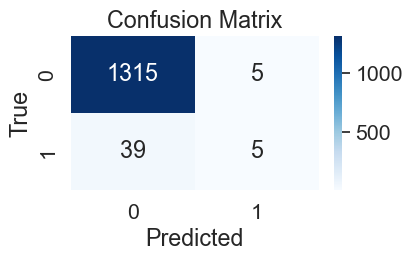

In [24]:
cm=confusion_matrix(y_test,y_pred)
sns.set(font_scale=1.4) # Adjust to fit labels on plot
fig, ax = plt.subplots(figsize=(4,2 ))

# Plot confusion matrix using heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Handle Class Imabalnce

In [25]:
y.value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

<AxesSubplot:ylabel='Bankrupt'>

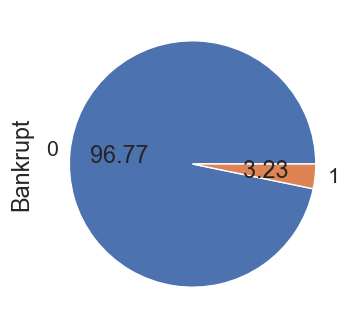

In [26]:
fig = plt.subplots(figsize=(4,4))
y.value_counts().plot.pie(autopct='%.2f')

In [27]:
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE object
smote = SMOTE()

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

In [28]:
# Checking the SMOTE output 
y_resampled.value_counts()

1    6599
0    6599
Name: Bankrupt, dtype: int64

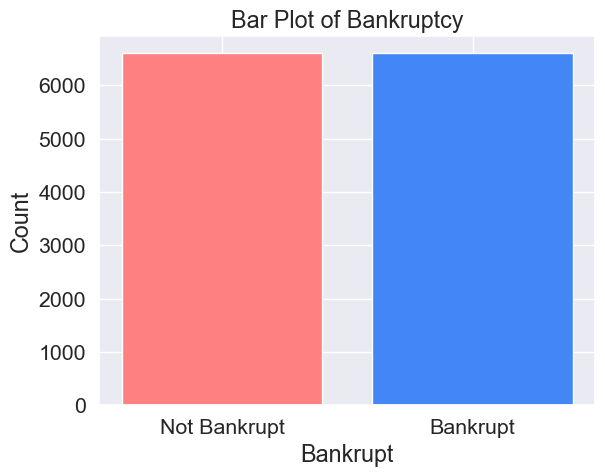

In [29]:
# plotting sampled output
counts = y_resampled.value_counts()
colors = ['#4287f5', '#ff8080']# Set the color for the minority class to red
plt.bar(counts.index, counts.values, color=colors)
plt.xticks(np.arange(len(counts)), ['Not Bankrupt', 'Bankrupt'])
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.title('Bar Plot of Bankruptcy')

plt.show()

In [30]:
scaler=StandardScaler()
X_rscaled=scaler.fit_transform(X_resampled)

pca=PCA(0.95)
X_sampledpca=pca.fit_transform(X_rscaled)

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X_sampledpca,y_resampled,test_size=0.2,random_state=42)

In [32]:
# Holdout data to validate a model
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [41]:
lgbm_clf = LGBMClassifier()
# Define parameter grid
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'num_leaves': [31, 62, 127],
    'max_depth': [3, 5, 7],
    'min_child_samples': [20, 50, 100],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=lgbm_clf,param_grid=param_grid, scoring='f1', cv=5)

grid_search.fit(X_train, y_train)
# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best score
print("Best F1 Score:", grid_search.best_score_)

# Predict on test data
y_pred = grid_search.predict(X_test)

# Print metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_child_samples': 50, 'n_estimators': 200, 'num_leaves': 127, 'reg_alpha': 0, 'reg_lambda': 0}
Best F1 Score: 0.9775104039632818
Confusion Matrix:
 [[1280   54]
 [   0 1306]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1334
           1       0.96      1.00      0.98      1306

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



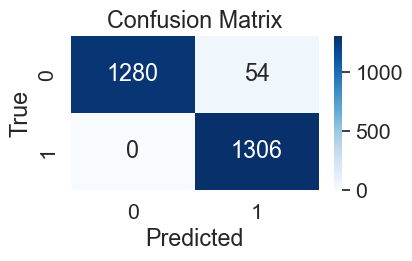

In [42]:
# Plot confusion matrix to check the modelprediction
cm=confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4) # Adjust to fit labels on plot
fig, ax = plt.subplots(figsize=(4,2 ))

# Plot confusion matrix using heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [46]:
# Intializing the model with params obtained from GridSearch CV
lgbm_clf = LGBMClassifier(learning_rate=0.2, max_depth=7, min_child_samples=50,
                          n_estimators=200, num_leaves=127, reg_alpha=0, reg_lambda=0)


# Fit the model
lgbm_clf.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.2, max_depth=7, min_child_samples=50,
               n_estimators=200, num_leaves=127, reg_alpha=0, reg_lambda=0)

In [44]:
# Predict the validation set
y_pred_val = lgbm_clf.predict(X_val)

In [ ]:
# Plot confusion matrix to check the modelprediction
cm=confusion_matrix(y_val, y_pred_val)
sns.set(font_scale=1.4) # Adjust to fit labels on plot
fig, ax = plt.subplots(figsize=(4,2 ))

# Plot confusion matrix using heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [45]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))
print("Classification Report:\n", classification_report(y_val, y_pred_val))

Confusion Matrix:
 [[1018   45]
 [   1 1048]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1063
           1       0.96      1.00      0.98      1049

    accuracy                           0.98      2112
   macro avg       0.98      0.98      0.98      2112
weighted avg       0.98      0.98      0.98      2112



## Feature importance

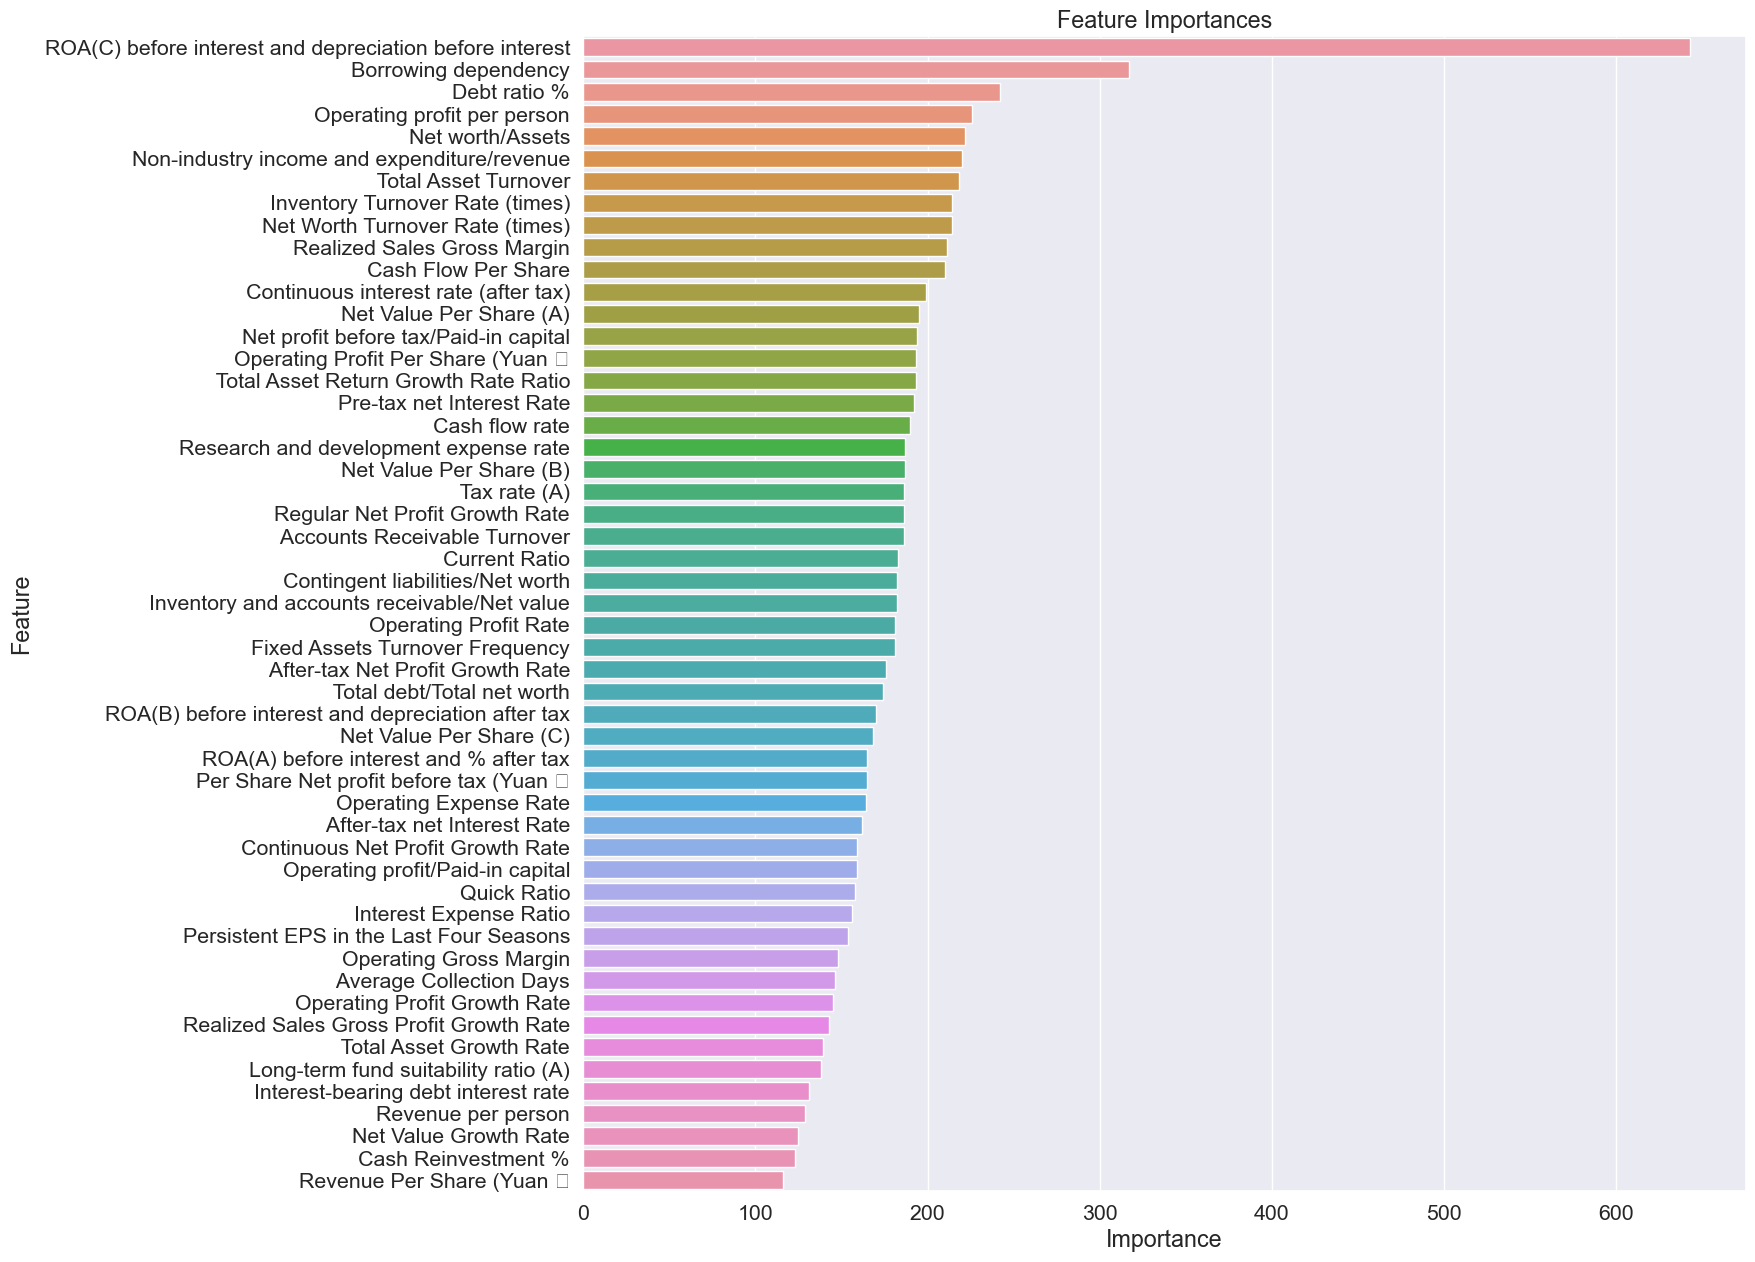

In [48]:

# train LightGBM model with best parameters
# lgb_model = lgb.LGBMClassifier(learning_rate=0.2, max_depth=7, min_child_samples=50,
#                n_estimators=200, num_leaves=127, reg_alpha=0, reg_lambda=0)
# lgb_model.fit(X_train, y_train)

# get feature importances
importances = lgbm_clf.feature_importances_

# create a list of feature names
feature_names = df.columns.tolist()  # assuming df is your original dataframe

# create a dictionary of feature names and importances
feature_importances = dict(zip(feature_names, importances))

# create a dataframe of feature importances sorted by importance value
sorted_feature_importances = pd.DataFrame(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True), columns=['Feature', 'Importance'])

# plot feature importances
plt.figure(figsize=(15, 15))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
'''
# Inferences tree based outperforms in case of higly imbalanced dataset
# The key influencers for that leads to bankrupt of a firm:
    * ROA(C) before interest and depreciation before interest
    * Borrowing dependency
    * Debt ratio %
    * Operating profit person
    * Networth/Assets
# Handling Class imabalnce improved the model performance
    
    '''
   
    
